In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [11]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")


In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

text  compound  positive  \
0  Less than two miles from Icelands Reykjavik ai...   -0.1531     0.000   
1  At least that's the idea. While it's not as in...    0.2263     0.040   
2  High school students in France may be among th...    0.0000     0.000   
3  TL;DR: The in-depth Complete Blockchain and Et...    0.4404     0.059   
4  Our robot colleague Satoshi Nakaboto writes ab...    0.5070     0.069   

   negative  neutral  
0     0.039    0.961  
1     0.000    0.960  
2     0.000    1.000  
3     0.000    0.941  
4     0.000    0.931

In [13]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

text  compound  positive  \
0  TL;DR: The in-depth Complete Blockchain and Et...    0.4404     0.059   
1  Disrupt Berlin is right around the corner. And...    0.6249     0.100   
2  At least that's the idea. While it's not as in...    0.2263     0.040   
3  he plaBy now, you should almost certainly know...    0.4601     0.085   
4  Blockchain has been picking up the pace since ...   -0.3089     0.000   

   negative  neutral  
0     0.000    0.941  
1     0.000    0.900  
2     0.000    0.960  
3     0.000    0.915  
4     0.055    0.945

In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.iloc[:, 1:5].describe()

compound   positive   negative    neutral
count  19.000000  19.000000  19.000000  19.000000
mean    0.414700   0.063368   0.004789   0.931842
std     0.249029   0.035556   0.014509   0.034862
min    -0.153100   0.000000   0.000000   0.857000
25%     0.333350   0.062500   0.000000   0.927000
50%     0.507000   0.068000   0.000000   0.932000
75%     0.516850   0.070500   0.000000   0.937000
max     0.816600   0.143000   0.052000   1.000000

In [16]:
# Describe the Ethereum Sentiment
ethereum_df.iloc[:, 1:5].describe()

compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.252160   0.055350   0.016100   0.928600
std     0.338877   0.047744   0.029755   0.058029
min    -0.440400   0.000000   0.000000   0.738000
25%     0.000000   0.000000   0.000000   0.913000
50%     0.345350   0.054500   0.000000   0.937500
75%     0.464250   0.087000   0.010500   0.952750
max     0.690800   0.173000   0.090000   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (0.063)

Q: Which coin had the highest compound score?

A: Bitcoin (0.817)

Q. Which coin had the highest positive score?

A: ethereum (0.173)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [50]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [51]:
# Expand the default stopwords list if necessary
sw_addon = {'chars'}

text = bitcoin_df.text[0]
regex = re.compile("[^a-zA-Z ]")
clean_text = regex.sub('', text)
sentence = sent_tokenize(clean_text)
words = []
for sent in sentence:
    word = word_tokenize(sent)
    words = words + word
words_lower = [word.lower() for word in words]
sw = set(stopwords.words('english'))
words_sw = [word for word in words_lower if word not in sw.union(sw_addon)]
tokens = [lemmatizer.lemmatize(word) for word in words_sw]

In [53]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
    # Create a list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word    
    # Convert the words to lowercase
    words_lower = [word.lower() for word in words]    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lower if word not in sw.union(sw_addon)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words_sw]
    return tokens


In [54]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()

text  compound  positive  \
0  Less than two miles from Icelands Reykjavik ai...   -0.1531     0.000   
1  At least that's the idea. While it's not as in...    0.2263     0.040   
2  High school students in France may be among th...    0.0000     0.000   
3  TL;DR: The in-depth Complete Blockchain and Et...    0.4404     0.059   
4  Our robot colleague Satoshi Nakaboto writes ab...    0.5070     0.069   

   negative  neutral                                             tokens  
0     0.039    0.961  [le, two, mile, iceland, reykjavik, airport, s...  
1     0.000    0.960  [least, thats, idea, intensive, mining, bitcoi...  
2     0.000    1.000  [high, school, student, france, may, among, fi...  
3     0.000    0.941  [tldr, indepth, complete, blockchain, ethereum...  
4     0.000    0.931  [robot, colleague, satoshi, nakaboto, writes, ...

In [55]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()

text  compound  positive  \
0  TL;DR: The in-depth Complete Blockchain and Et...    0.4404     0.059   
1  Disrupt Berlin is right around the corner. And...    0.6249     0.100   
2  At least that's the idea. While it's not as in...    0.2263     0.040   
3  he plaBy now, you should almost certainly know...    0.4601     0.085   
4  Blockchain has been picking up the pace since ...   -0.3089     0.000   

   negative  neutral                                             tokens  
0     0.000    0.941  [tldr, indepth, complete, blockchain, ethereum...  
1     0.000    0.900  [disrupt, berlin, right, around, corner, plent...  
2     0.000    0.960  [least, thats, idea, intensive, mining, bitcoi...  
3     0.000    0.915  [plaby, almost, certainly, know, ethereum, eth...  
4     0.055    0.945  [blockchain, picking, pace, since, inception, ...

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [56]:
from collections import Counter
from nltk import ngrams

In [62]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('satoshi', 'nakaboto'), 26),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'daywelcome'), 13),
 (('daywelcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'bitcoin'), 13)]

In [63]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('complete', 'blockchain'), 3),
 (('blockchain', 'ethereum'), 3),
 (('ethereum', 'programmer'), 3),
 (('programmer', 'bundle'), 3),
 (('dark', 'mode'), 3),
 (('platform', 'would'), 2),
 (('digital', 'currency'), 2),
 (('given', 'goahead'), 2),
 (('goahead', 'country'), 2),
 (('royal', 'bank'), 2)]

In [64]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [66]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('bitcoin', 44),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('daywelcome', 13),
 ('another', 13)]

In [67]:
# Get the top 10 words for Ethereum
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('cryptocurrency', 12),
 ('bitcoin', 7),
 ('blockchain', 6),
 ('ethereum', 6),
 ('bank', 5),
 ('bundle', 4),
 ('company', 4),
 ('dark', 4),
 ('time', 4),
 ('complete', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

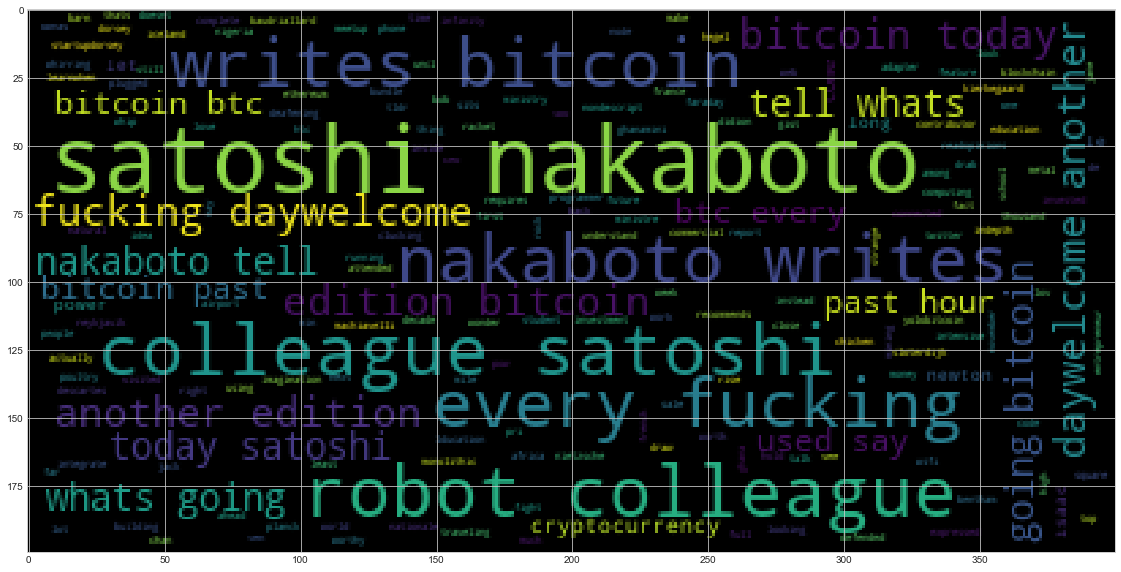

In [72]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

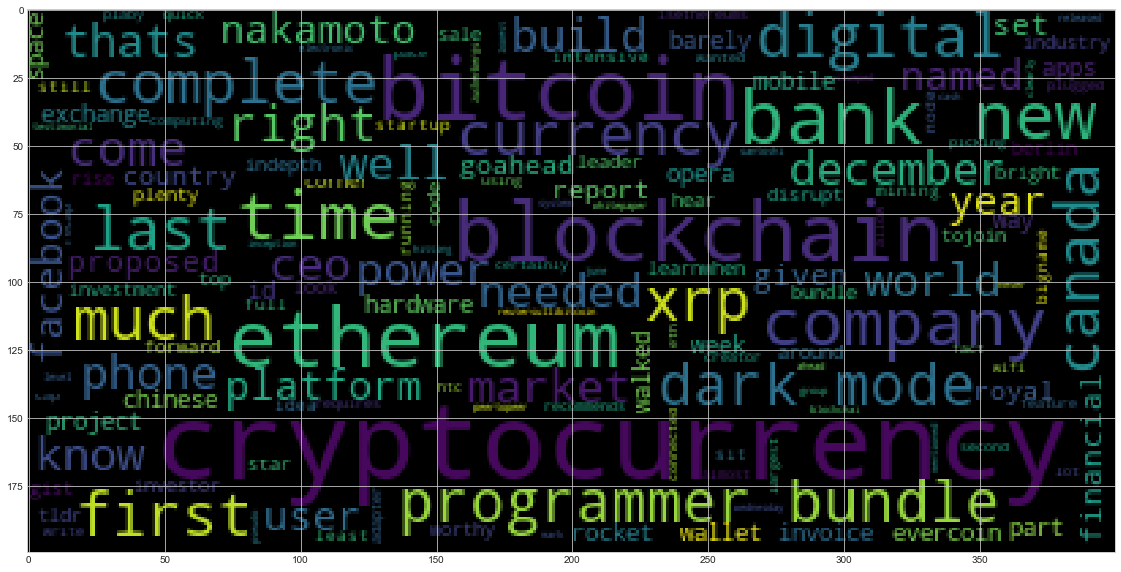

In [73]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [75]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [77]:
# Concatenate all of the bitcoin text together
article = ' '.join(bitcoin_df['text'])
article

"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Crypt

In [79]:
# Run the NER processor on all of the text
doc = nlp(article)
# Add a title to the document


In [80]:
# Render the visualization
displacy.render(doc, style='ent')

In [88]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Less than two miles QUANTITY
Reykjavik airport FAC
tens of thousands CARDINAL
Bitcoin PERSON
HTC ORG
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERSON
Square FAC
Jack Dorsey PERSON
Bitcoin PERSON
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin PERSON
Africa LOC
Ni

---

## Ethereum NER

In [89]:
# Concatenate all of the bitcoin text together
article = ' '.join(ethereum_df['text'])
article

"TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars] Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\nEther

In [90]:
# Run the NER processor on all of the text
doc = nlp(article)
# Add a title to the document

In [91]:
# Render the visualization
displacy.render(doc, style='ent')

In [92]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Disrupt Berlin PERSON
December 11 and December 12 DATE
Bitcoin PERSON
HTC ORG
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto PERSON
Bitcoin PERSON
Blockchai GPE
Reuters ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg GPE
Swiss NORP
countrys NORP
Swiss NORP
Block ORG
The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Royal Bank of Canada ORG
Opera ORG
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
XRP ORG
Bitcoin PERSON
XRP ORG
third ORDINAL
Bitcoin PERSON
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
first ORDINAL
last week DATE
Chinese NORP
2021 DATE
first ORDINAL
last year DATE
Chinese NORP
Tencent GPE
countrys NORP
British Columbia GPE
Canada GPE
+2554 ORG
May 2016 DATE
San Francisco GPE
Montgomery Street FAC
Wells Fargo ORG
two CARDINAL
The Complete Blockchain &